<a href="https://colab.research.google.com/github/franklinemomanyi/machinelearning/blob/main/5_Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv('Position_Salaries.csv')
x = data.iloc[:,1:-1].values
y = data.iloc[:,-1].values
y = y.reshape(len(y),1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x = scx.fit_transform(x)
y = scy.fit_transform(y)

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
scy.inverse_transform(regressor.predict(scx.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

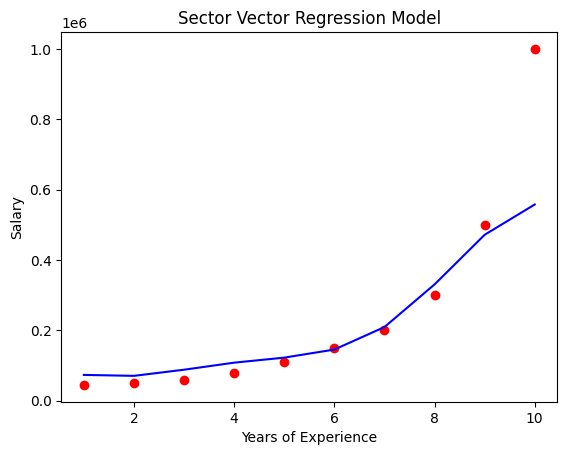

In [ ]:
plt.scatter(scx.inverse_transform(x),scy.inverse_transform(y),color='red')
plt.plot(scx.inverse_transform(x), scy.inverse_transform(regressor.predict(x).reshape(-1,1)),color='blue')
plt.title('Sector Vector Regression Model')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

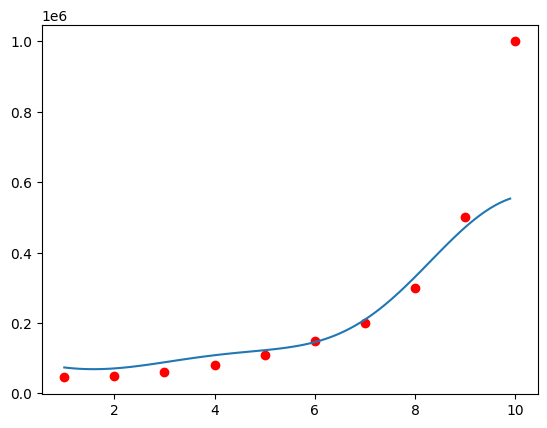

In [ ]:
x_grid = np.arange(min(scx.inverse_transform(x)),max(scx.inverse_transform(x)),0.1)
x_grid = x_grid.reshape(len(x_grid),1)

plt.scatter(scx.inverse_transform(x), scy.inverse_transform(y), color='red')
plt.plot(x_grid, scy.inverse_transform(regressor.predict(scx.transform(x_grid)).reshape(-1,1)))